### Import Appropriate Packages

In [139]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [140]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

### Data Loading and Cleaning

In [90]:
#read in the excel file

address = 'C:/Users/jmoore/HR-Data-Analysis/HR-Employee-Attrition.xlsx'


df = pd.read_excel(address)


In [91]:
categorical_vars = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [92]:
df['Attrition_coded'] = np.where(df['Attrition']=='Yes',1,0)

#BusinessTravel
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [93]:
conditions = [
    df['BusinessTravel']=='Travel_Rarely',
    df['BusinessTravel']=='Travel_Frequently',
    df['BusinessTravel']=='Non-Travel']
choices = [1,2,0]
df['BusinessTravel_coded'] = np.select(conditions,choices)

#Department
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [94]:
conditions = [
    df['Department']=='Sales',
    df['Department']=='Research & Development',
    df['Department']=='Human Resources'
]
choices = [0,1,2]
df['Department_coded'] = np.select(conditions,choices)

#Education Field
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [95]:
conditions = [
    df['EducationField'] == 'Life Sciences',
    df['EducationField'] == 'Other',
    df['EducationField'] == 'Medical',
    df['EducationField'] == 'Marketing',
    df['EducationField'] == 'Technical Degree',
    df['EducationField'] == 'Human Resources',
]
choices = [0,1,2,3,4,5]
df['EducationField_coded'] = np.select(conditions,choices)

#Gender
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [96]:
df['Gender_coded'] = np.where(df['Gender']=='Male',1,0)

#Job Role
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [97]:
conditions= [
    df['JobRole'] == 'Sales Executive',
    df['JobRole'] == 'Research Scientist',
    df['JobRole'] == 'Laboratory Technician',
    df['JobRole'] == 'Manufacturing Director',
    df['JobRole'] == 'Healthcare Representative',
    df['JobRole'] == 'Manager',
    df['JobRole'] == 'Sales Representative',
    df['JobRole'] == 'Research Director',
    df['JobRole'] == 'Human Resources'
]
choices = [0,1,2,3,4,5,6,7,8]
df['JobRole_coded'] = np.select(conditions,choices)

#Marital Status
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [98]:
conditions = [
    df['MaritalStatus'] == 'Single',
    df['MaritalStatus'] == 'Married',
    df['MaritalStatus'] == 'Divorced'
]
choices = [0,1,2]
df['MaritalStatus_coded'] = np.select(conditions,choices)

#Overtime
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [99]:
df['OverTime_coded'] = np.where(df['OverTime']=='Yes',1,0)
df['OverTime_coded'].head()

0    1
1    0
2    1
3    1
4    0
Name: OverTime_coded, dtype: int32

In [100]:
#remove Variables that provide no information gain or loss
vars_to_drop = ['EmployeeCount','StandardHours','Over18','EmployeeNumber']
df.drop(vars_to_drop,axis = 1, inplace=True)

In [101]:
len(df.columns)

39

### Use Random Forest to Identify Important Variables

In [102]:
target = df.Attrition
data = df.drop('Attrition',axis = 1, inplace=False)
Uncoded_vars = ['Attrition_coded','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
data = data.drop(Uncoded_vars,axis=1,inplace = False)

In [103]:
randForest = RandomForestClassifier(n_estimators=500,random_state=44)
randForest.fit(data,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=44, verbose=0, warm_start=False)

#### Plot Variable Importance with respect to Gini Importance

Text(0, 0.5, 'Important Features')

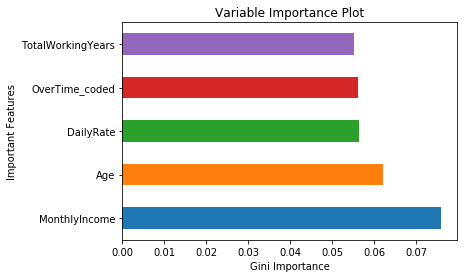

In [104]:
feat_importances = pd.Series(randForest.feature_importances_, index=data.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Variable Importance Plot")
plt.xlabel('Gini Importance')
plt.ylabel('Important Features')

### Visualizations

#### OverTime
The purpose of this plot is to visualize how Overtime is related to attrition rate

In [129]:
ot_att = df[['OverTime','Attrition']]
test_list = pd.Series(range(0,len(ot_att.index)))

In [133]:
#compute attrition rate for overtime
ot_yes = sum(1 for i in test_list if ot_att.OverTime[i]=='Yes' and ot_att.Attrition[i] == 'Yes')
tot_ot_yes = sum(1 for i in test_list if ot_att.OverTime[i]=='Yes')


In [134]:
#compute attrition rate for no overtime
ot_no = sum(1 for i in test_list if ot_att.OverTime[i]=='No' and ot_att.Attrition[i] == 'Yes')
tot_ot_no = sum(1 for i in test_list if ot_att.OverTime[i]=='No')


In [137]:
#compute total number or attrition cases company wide
tot_att = sum(1 for i in test_list if ot_att.Attrition[i]=='Yes')

In [141]:
#Create a list of attrition rates for overtime, no overtime, and company average
attritionRates = [ot_yes/tot_ot_yes,ot_no/tot_ot_no,tot_att/len(ot_att.index)]
attritionRates

0.30528846153846156

Text(0, 0.5, 'Attrition Rate')

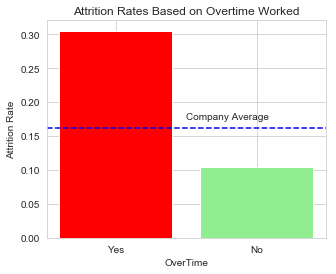

In [163]:
x = ['Yes','No']
y = [attritionRates[0],attritionRates[1]]
plt.bar(x,y,color = ['red','lightgreen'])
plt.axhline(attritionRates[2], color='b',linestyle = 'dashed')
plt.annotate('Company Average', xy = (1,attritionRates[2]),xytext = (0.5,0.175))
plt.title('Attrition Rates Based on Overtime Worked')
plt.xlabel('OverTime')
plt.ylabel('Attrition Rate')

The takeaway from the above chart is that Attrition rate is much higher for individuals who work overtime.